In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing


In [4]:
california = fetch_california_housing()
data=pd.DataFrame(california.data,columns=california.feature_names)
data["SalePrice"] = california.target * 100000
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [6]:
print(data.shape)
print()
data.info()
print()
data.describe()

(20640, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


In [8]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalePrice     0
dtype: int64

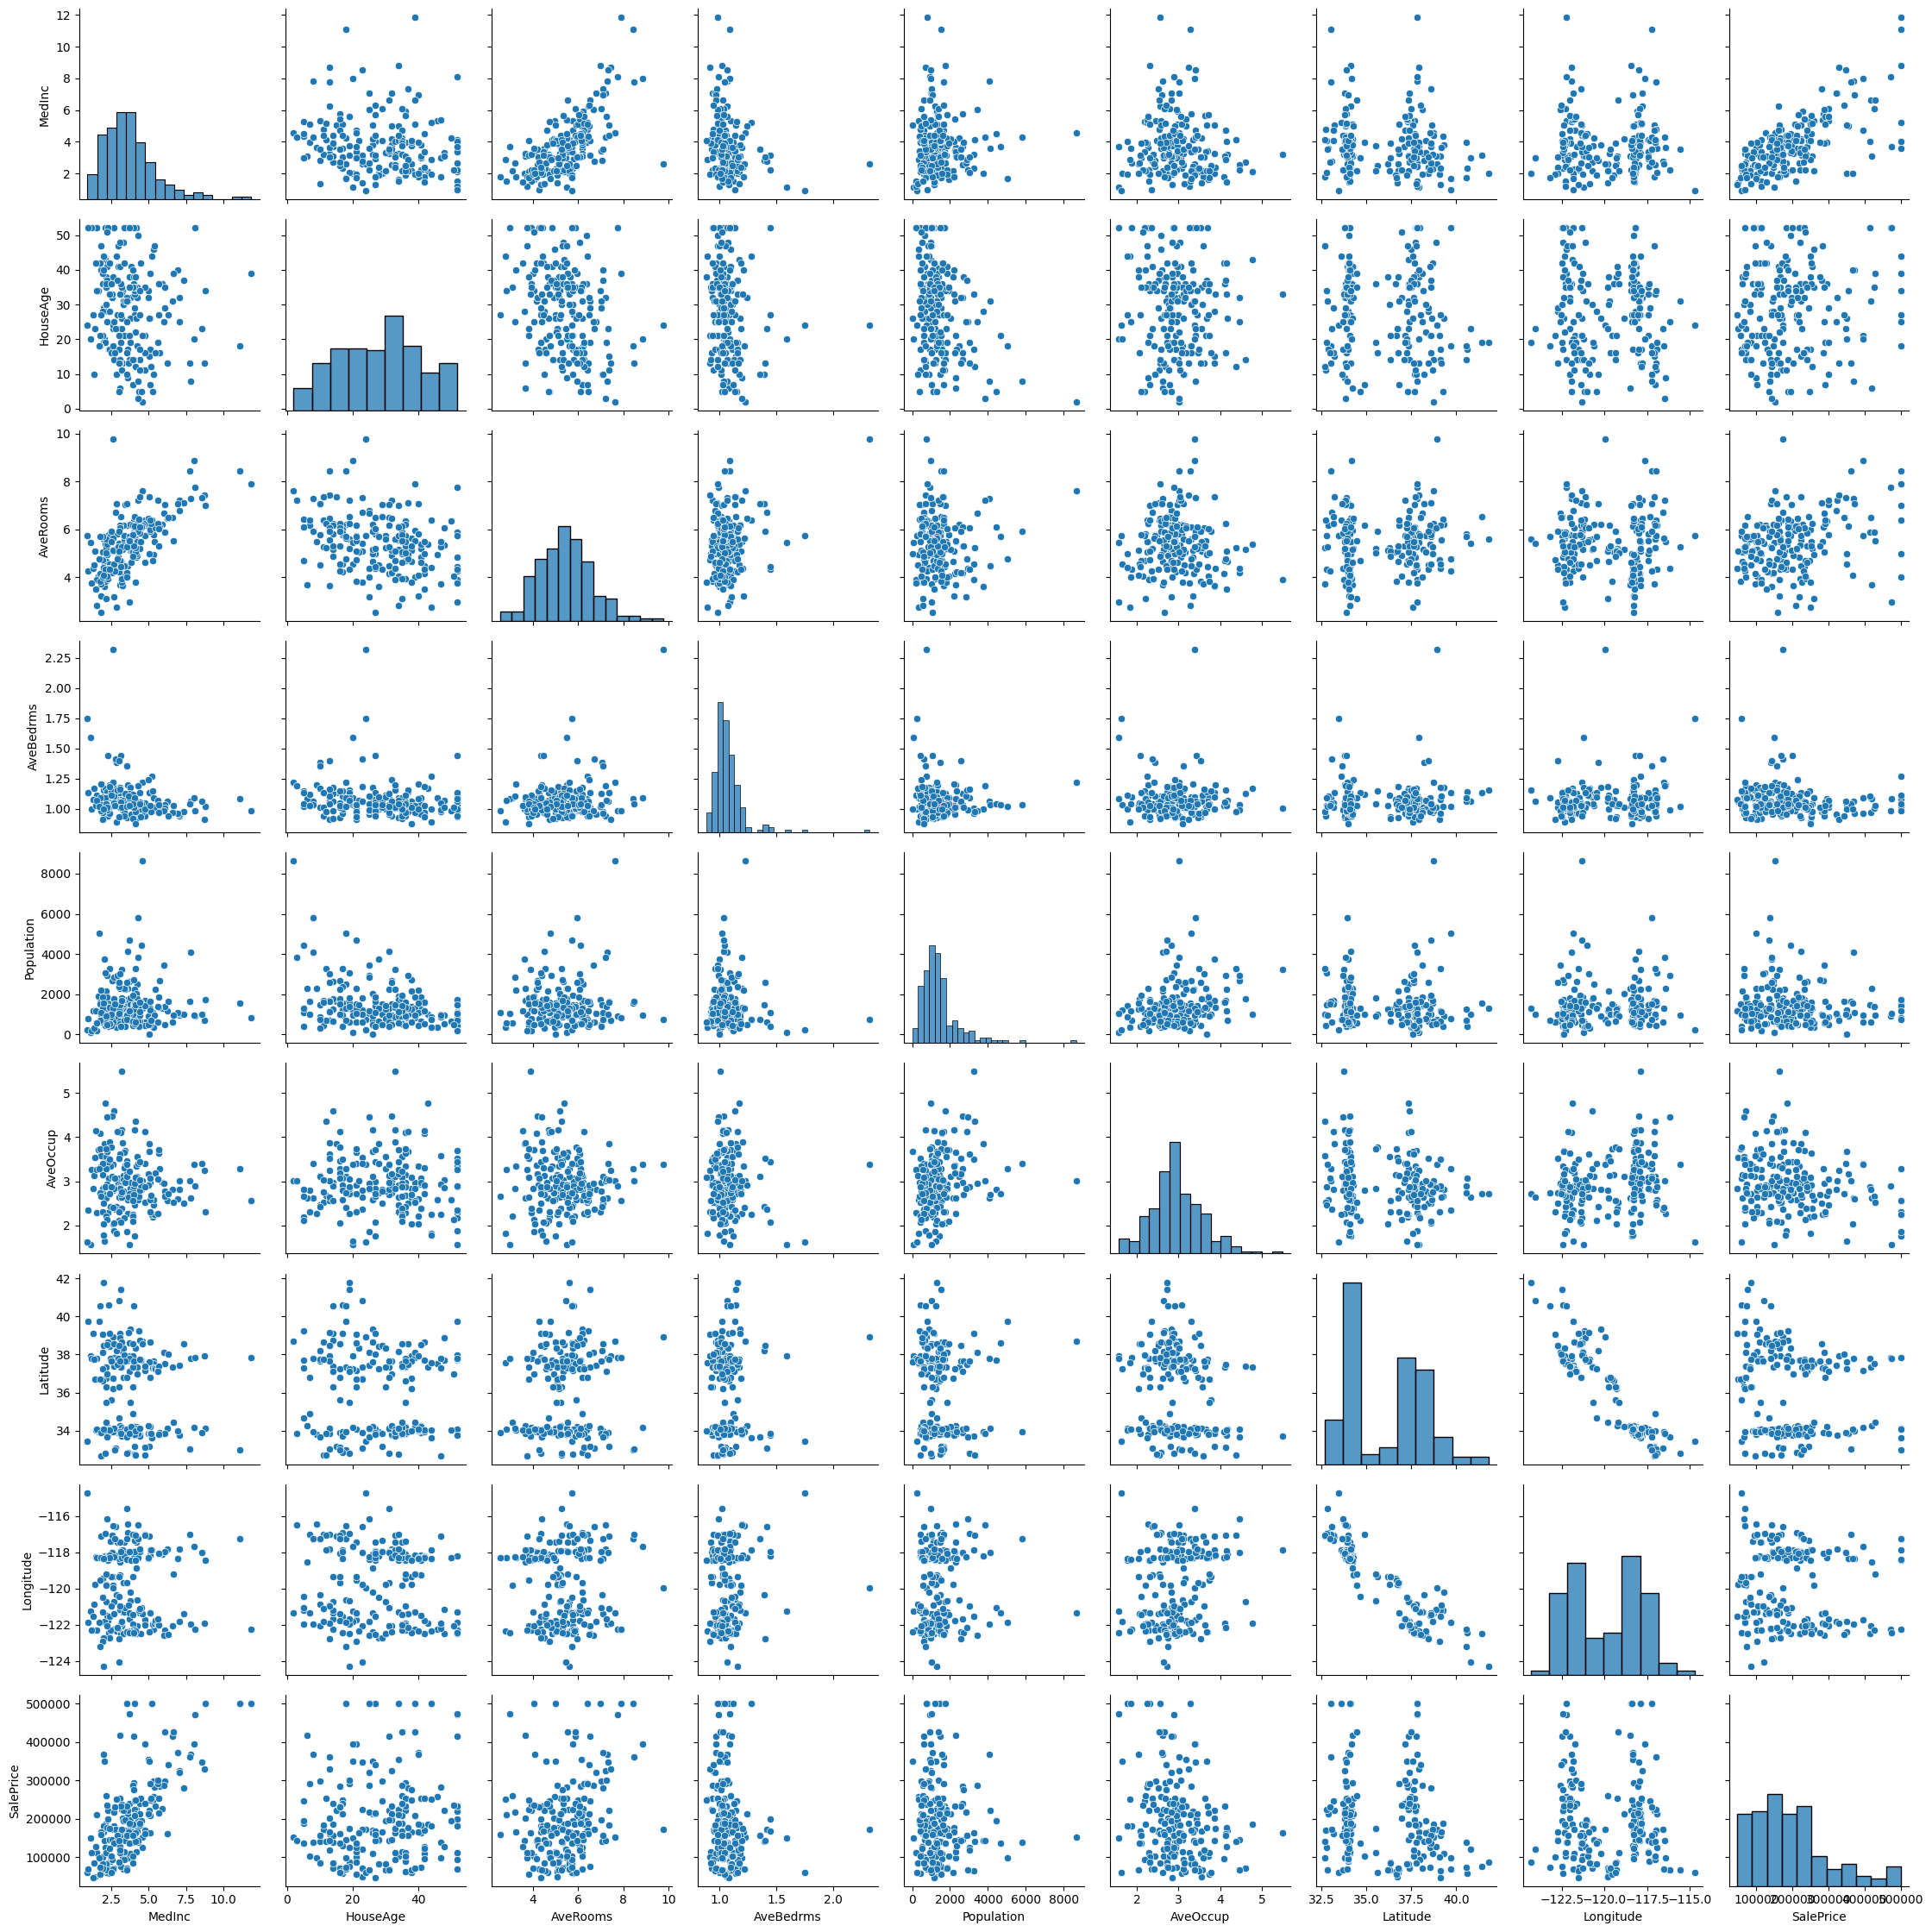

In [9]:
sns.pairplot(data.sample(200), height=2.5)
plt.tight_layout()

Skewness:0.977763
Kurtosis: 0.327870


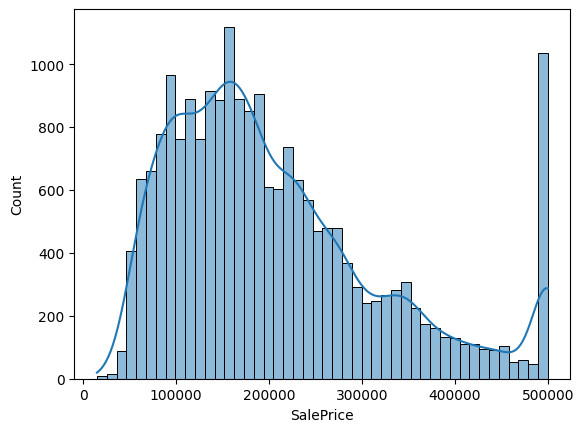

In [12]:
sns.histplot(data['SalePrice'], kde=True)
print("Skewness:%f" %data['SalePrice'].skew())
print("Kurtosis: %f" %data['SalePrice'].kurt())

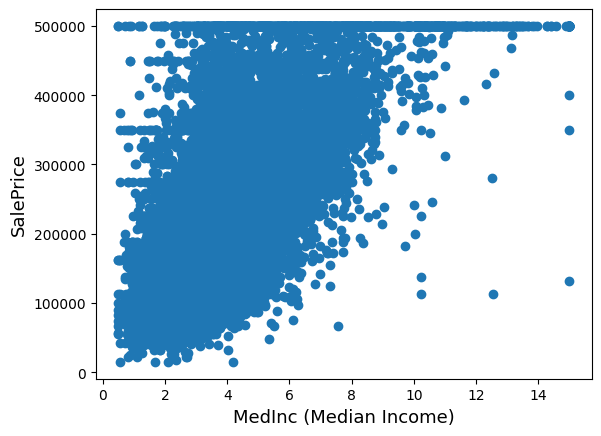

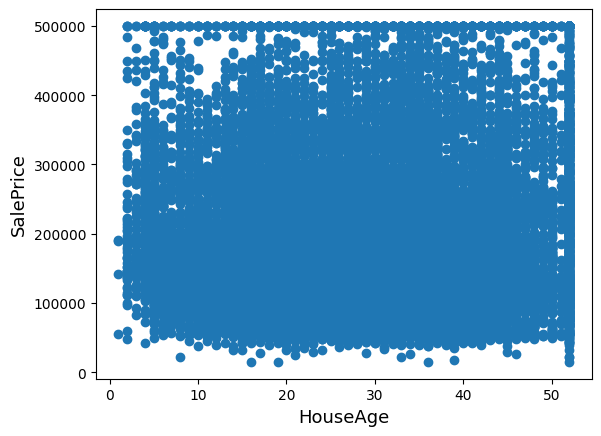

In [13]:
fig, ax = plt.subplots()
ax.scatter(x=data['MedInc'], y=data['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('MedInc (Median Income)', fontsize=13)
plt.show()

fig, ax = plt.subplots()
ax.scatter(x=data['HouseAge'], y=data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('HouseAge', fontsize=13)
plt.show()


 mu = 206855.82 and sigma = 115392.82



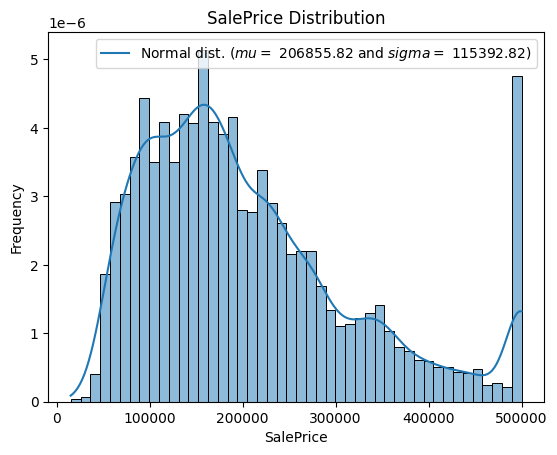

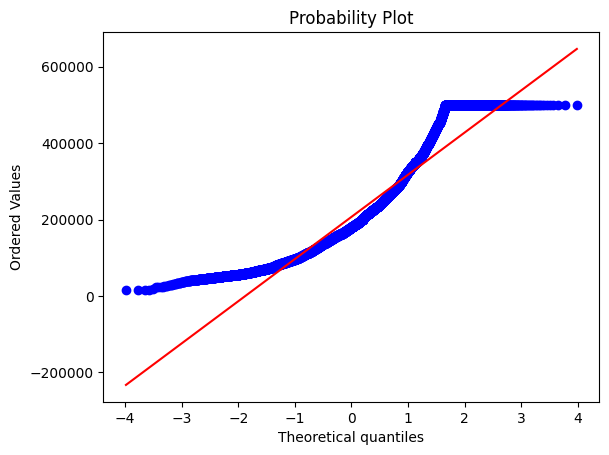

In [17]:
from scipy import stats
from scipy.stats import norm, skew
sns.histplot(data['SalePrice'], kde=True, stat="density")
(mu, sigma) = norm.fit(data['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

plt.legend(['Normal dist. ($mu=$ {:.2f} and $sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()


 mu = 12.08 and sigma = 0.57



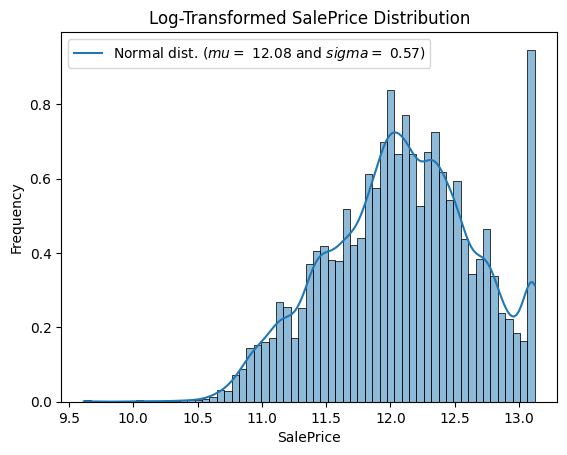

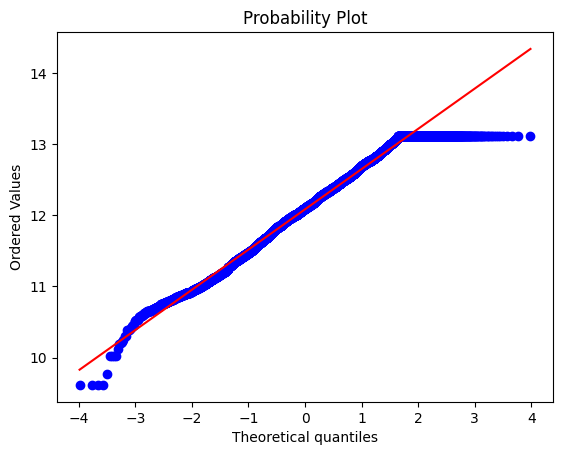

In [18]:
data["SalePrice"] = np.log1p(data["SalePrice"])

sns.histplot(data['SalePrice'], kde=True, stat="density")
(mu, sigma) = norm.fit(data['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

plt.legend(['Normal dist. ($mu=$ {:.2f} and $sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Log-Transformed SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

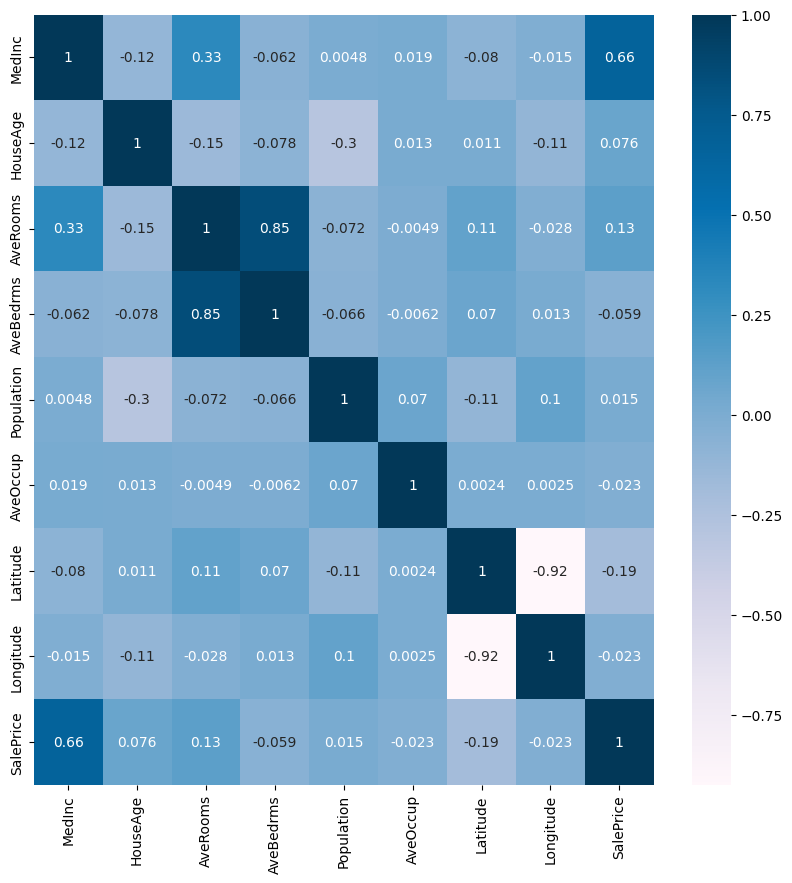

In [19]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [20]:
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target > 0.2]
names = [index for index, value in relevant_features.items() if index != 'SalePrice']

print(names)
print(len(names))

['MedInc']
1


In [30]:
from sklearn.model_selection import train_test_split

x = data.drop("SalePrice", axis = 1)
y = data["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

print("Actual value of house (log-scale):- ", y_test.iloc[1])
print("Model Predicted Value (log-scale):- ", predictions[1])

Actual value of house (log-scale):-  10.732061203925053
Model Predicted Value (log-scale):-  11.984255968959202


In [32]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.3630286786379345
